In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.read_csv('/content/drive/MyDrive/Assessment2_707/patient_profile_lifestyle.csv')
df2=pd.read_csv('/content/drive/MyDrive/Assessment2_707/admission_clinical_data.csv')

In [6]:
df1.columns

Index(['patient_id', 'age', 'gender', 'weight_kg', 'height_cm', 'bmi',
       'smoking_status', 'alcohol_use', 'physical_activity', 'social_support',
       'mental_health_issue'],
      dtype='object')

In [7]:
df2.columns

Index(['patient_id', 'num_previous_admissions', 'chronic_conditions',
       'medications_count', 'last_hemoglobin', 'last_glucose',
       'last_creatinine', 'admission_type', 'length_of_stay',
       'procedures_count', 'insurance_type', 'followup_compliance',
       'readmission_risk'],
      dtype='object')

In [8]:
print(f"\nFirst 2 rows of dataset 1")
print("\n",df1.head(2))
print(f"\nFirst 2 rows of dataset 2")
print("\n",df2.head(2))


First 2 rows of dataset 1

                              patient_id  age  gender  weight_kg  height_cm  \
0  d8fd1a56-a5d8-499b-917c-f9ac8d369f9b   18    Male         57        157   
1  2e9b4349-69e5-494f-b806-947ec5b5bb7c   23  Female        117        150   

    bmi smoking_status alcohol_use physical_activity social_support  \
0  23.1            NaN         NaN               NaN           Weak   
1  52.0          Never        High            Medium           Weak   

  mental_health_issue  
0                 NaN  
1                 Yes  

First 2 rows of dataset 2

                              patient_id  num_previous_admissions  \
0  d8fd1a56-a5d8-499b-917c-f9ac8d369f9b                        8   
1  2e9b4349-69e5-494f-b806-947ec5b5bb7c                        6   

  chronic_conditions  medications_count  last_hemoglobin  last_glucose  \
0      Heart Disease                  8             16.2           NaN   
1           Diabetes                  6             13.1         137

In [9]:
# checking the shape
print(f"Shape of First Dataset:", df1.shape)
print(f"Shape of Second Dataset",df2.shape)

Shape of First Dataset: (9999, 11)
Shape of Second Dataset (9999, 13)


In [10]:
#check missing values
print(f"Missing Values in First Dataset:")
print(df1.isnull().sum())
print(f"Missing Values in Second Dataset")
print(df2.isnull().sum())

Missing Values in First Dataset:
patient_id                0
age                       0
gender                    0
weight_kg                 0
height_cm                 0
bmi                       0
smoking_status          800
alcohol_use            3771
physical_activity       800
social_support            0
mental_health_issue     800
dtype: int64
Missing Values in Second Dataset
patient_id                    0
num_previous_admissions       0
chronic_conditions         2032
medications_count             0
last_hemoglobin               0
last_glucose                800
last_creatinine             800
admission_type                0
length_of_stay                0
procedures_count              0
insurance_type                0
followup_compliance         800
readmission_risk              0
dtype: int64


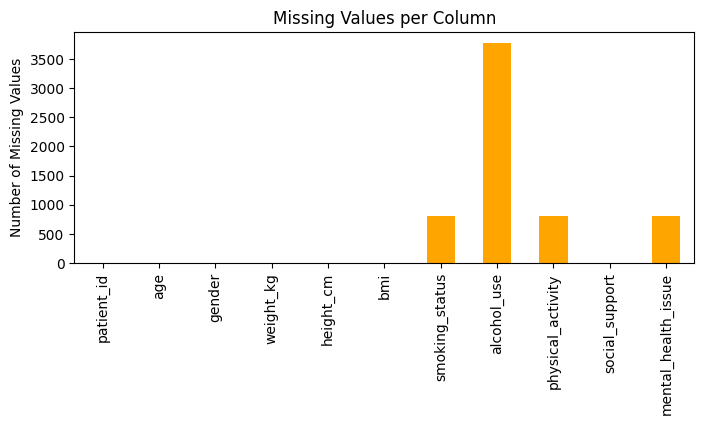

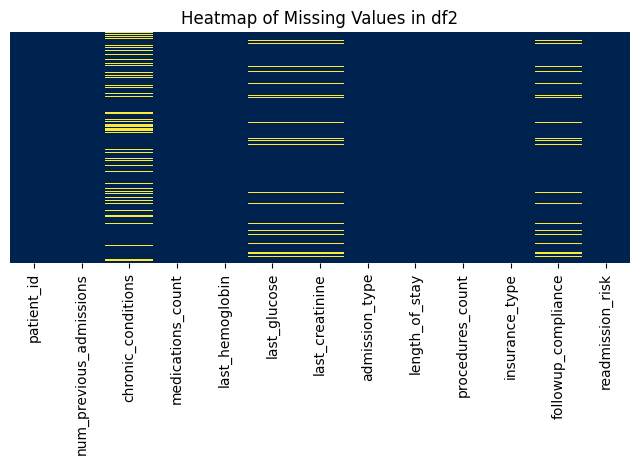

In [11]:
# visualisation
# bar plot of first dataset
missing_data=df1.isnull().sum()
plt.figure(figsize=(8,3))
missing_data.plot(kind='bar', color='orange')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.show()

# heatmap of second dataset
plt.figure(figsize=(8,3))
sns.heatmap(df2.isnull(), cbar=False, yticklabels=False, cmap='cividis')
plt.title('Heatmap of Missing Values in df2')
plt.show()

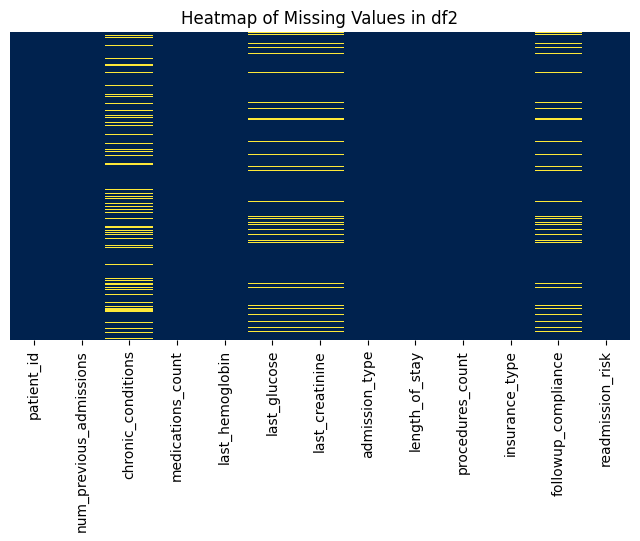

In [12]:
# heatmap of second dataset
plt.figure(figsize=(8,4))
sns.heatmap(df2.isnull(), cbar=False, yticklabels=False, cmap='cividis')
plt.title('Heatmap of Missing Values in df2')
plt.show()

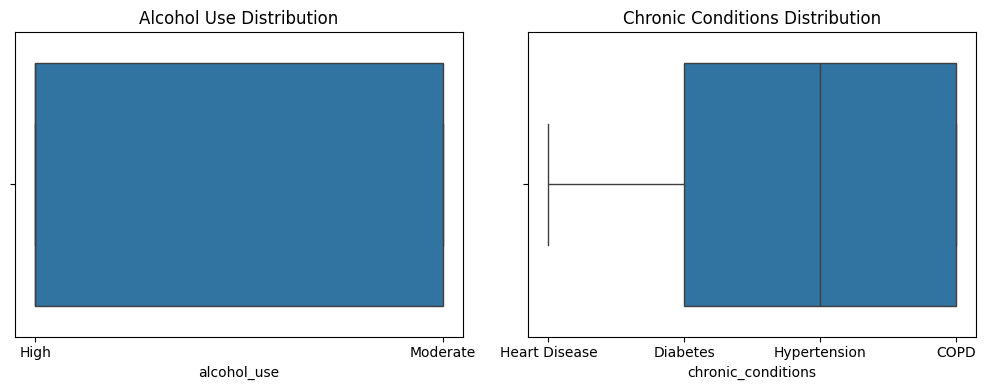

In [13]:
# checking outliers
#import libraries

import seaborn as sns
import matplotlib.pyplot as plt


# Create a single figure with 2 subplots (1 row, 2 columns)
plt.figure(figsize=(10,4))

# First box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['alcohol_use'])
plt.title('Alcohol Use Distribution')

# Second box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df2['chronic_conditions'])
plt.title('Chronic Conditions Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
#check data types
print(f"Data Types of First Dataset:")
print(df1.dtypes)
print(f"Data Types of Second Dataset:")
print(df2.dtypes)

Data Types of First Dataset:
patient_id              object
age                      int64
gender                  object
weight_kg                int64
height_cm                int64
bmi                    float64
smoking_status          object
alcohol_use             object
physical_activity       object
social_support          object
mental_health_issue     object
dtype: object
Data Types of Second Dataset:
patient_id                  object
num_previous_admissions      int64
chronic_conditions          object
medications_count            int64
last_hemoglobin            float64
last_glucose               float64
last_creatinine            float64
admission_type              object
length_of_stay               int64
procedures_count             int64
insurance_type              object
followup_compliance         object
readmission_risk            object
dtype: object


In [15]:
# dataset 1 categorical values only
categorical_cols_df1 = df1.select_dtypes(exclude=np.number).columns.tolist()

# fill with mode imputation
for col in categorical_cols_df1:
    df1[col]=df1[col].fillna(df1[col].mode()[0])



In [16]:
# get the numeric columns
numerical_cols_df2 = df2.select_dtypes(include=np.number).columns.tolist()

#check the skewness of numeric columns.
for col in numerical_cols_df2:
    skewness = df2[col].skew()
    print(f"{col}:",skewness)
#filling missing values based on skewness for numeric columns
    if abs(skewness) < 0.5:  # roughly normal
        df2[col]=df2[col].fillna(df2[col].mean())
    else:  # skewed
        df2[col]=df2[col].fillna(df2[col].median())

#get the categorical columns
categorical_cols_df2 = df2.select_dtypes(exclude=np.number).columns.tolist()
# fil with mode
for col in categorical_cols_df2:
    df2[col]=df2[col].fillna(df2[col].mode()[0])


num_previous_admissions: -0.011777219688274441
medications_count: 0.03703738020168186
last_hemoglobin: -0.007472600329483842
last_glucose: -0.020088913888978644
last_creatinine: 0.007290342183425408
length_of_stay: -0.0075021859810175335
procedures_count: 0.0015010591747224658


In [17]:
#verify result
print(f"Missing Values in First Dataset:")
print(df1.isnull().sum())
print(f"Missing Values in Second Dataset")
print(df2.isnull().sum())

Missing Values in First Dataset:
patient_id             0
age                    0
gender                 0
weight_kg              0
height_cm              0
bmi                    0
smoking_status         0
alcohol_use            0
physical_activity      0
social_support         0
mental_health_issue    0
dtype: int64
Missing Values in Second Dataset
patient_id                 0
num_previous_admissions    0
chronic_conditions         0
medications_count          0
last_hemoglobin            0
last_glucose               0
last_creatinine            0
admission_type             0
length_of_stay             0
procedures_count           0
insurance_type             0
followup_compliance        0
readmission_risk           0
dtype: int64


In [18]:
print(f"duplicate values in dataset 1 :",df1.duplicated().sum())
print(f"duplicate values in dataset 2 :",df2.duplicated().sum())

duplicate values in dataset 1 : 0
duplicate values in dataset 2 : 0


In [19]:
df1.to_csv('cleaned_patient_profile_lifestyle.csv', index=False)
df2.to_csv('cleaned_admission_clinical_data.csv', index=False)

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


this part is not in report as i save it for me in my google drive

In [20]:
import os

drive_path = "/content/drive/MyDrive/Assessment2_707/cleaned_data"
os.makedirs(drive_path, exist_ok=True)

print("Drive folder ready")



Drive folder ready


In [21]:
df1.to_csv(
    "/content/drive/MyDrive/Assessment2_707/cleaned_data/cleaned_patient_profile_lifestyle.csv",
    index=False
)

df2.to_csv(
    "/content/drive/MyDrive/Assessment2_707/cleaned_data/cleaned_admission_clinical_data.csv",
    index=False
)

print("Cleaned files saved to Google Drive")


Cleaned files saved to Google Drive




ETL Process using py spark



In [19]:
!pip uninstall -y pyspark

Found existing installation: pyspark 4.0.1
Uninstalling pyspark-4.0.1:
  Successfully uninstalled pyspark-4.0.1


In [20]:
# install pyspark 3.5.1 (fully supported python 3.12)
!pip install pyspark==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 12.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=a0c7f39b88f38e718b5123faf3042a5bdd4a381fe08d458d54c34a5ae0739203
  Stored in directory: /root/.cache/pip/wheels/b1/91/5f/283b53010a8016a4ff1c4a1edd99bbe73afacb099645b5471b
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.9
    Uninstalling py4j-0.10.9.9:
      Successfully uninstalled py4j-0.10.9.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 1.0.1 requires pyspark[connect]~=4.0.0, but you have pyspark 3.5.1 which is incompatible.


In [21]:
!java -version

openjdk version "17.0.17" 2025-10-21
OpenJDK Runtime Environment (build 17.0.17+10-Ubuntu-122.04)
OpenJDK 64-Bit Server VM (build 17.0.17+10-Ubuntu-122.04, mixed mode, sharing)


In [22]:
#verify pyspark in python
import pyspark
print(f"Pyspark version:{pyspark.__version__}")
print(f"Evironment ready for data processing!")

Pyspark version:3.5.1
Evironment ready for data processing!


In [23]:
import os
os.makedirs("/tmp/spark-logs", exist_ok=True)

In [24]:
import os
import sys
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
import numpy as np

# set java location for colab
os.environ["JAVA_HOME"]= "/usr/lib/jvm/java-17-openjdk-amd64"

#create SparkSession
spark= SparkSession.builder\
    .appName("hospital_ETL")\
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.driver.memory", "2g") \
    .config("spark.eventLog.enabled", "true") \
    .config("spark.eventLog.dir", "/tmp/spark-logs") \
    .getOrCreate()

# Verify
print(f"✓ Spark Version: {spark.version}")
print(f"✓ App Name: {spark.sparkContext.appName}")
print(f"✓ Master: {spark.sparkContext.master}")
print(f"✓ SparkSession Ready: {type(spark)}")

✓ Spark Version: 3.5.1
✓ App Name: hospital_ETL
✓ Master: local[*]
✓ SparkSession Ready: <class 'pyspark.sql.session.SparkSession'>


In [25]:
# Load the CSV files into Spark DataFrames
spark_df1= spark.read.csv("cleaned_patient_profile_lifestyle.csv", header=True, inferSchema=True)
spark_df2= spark.read.csv("cleaned_admission_clinical_data.csv", header=True, inferSchema=True)

In [26]:
# standardizing
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType

#dataset 1
patient_df = spark_df1 \
    .withColumn("age", col("age").cast(IntegerType())) \
    .withColumn("weight_kg",col("weight_kg").cast(DoubleType())) \
    .withColumn("height_cm", col("height_cm").cast(DoubleType())) \
    .withColumn("bmi", col("bmi").cast(DoubleType()))
#dataset 2
admission_df = spark_df2 \
    .withColumn("num_previous_admissions", col("num_previous_admissions").cast(IntegerType())) \
    .withColumn("medications_count", col("medications_count").cast(IntegerType())) \
    .withColumn("length_of_stay", col("length_of_stay").cast(IntegerType())) \
    .withColumn("procedures_count", col("procedures_count").cast(IntegerType())) \
    .withColumn("last_glucose", col("last_glucose").cast(DoubleType())) \
    .withColumn("last_creatinine", col("last_creatinine").cast(DoubleType()))

print(f"Standardizing numeric types done.........\n")


Standardizing numeric types done.........



In [27]:
# delete duplicate records
spark_df1.dropDuplicates().count()

9999

Integrated two cleaned files

In [28]:
final_df = spark_df1.join(spark_df2,on="patient_id", how="inner")

In [29]:
print(final_df.printSchema())


root
 |-- patient_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- alcohol_use: string (nullable = true)
 |-- physical_activity: string (nullable = true)
 |-- social_support: string (nullable = true)
 |-- mental_health_issue: string (nullable = true)
 |-- num_previous_admissions: integer (nullable = true)
 |-- chronic_conditions: string (nullable = true)
 |-- medications_count: integer (nullable = true)
 |-- last_hemoglobin: double (nullable = true)
 |-- last_glucose: double (nullable = true)
 |-- last_creatinine: double (nullable = true)
 |-- admission_type: string (nullable = true)
 |-- length_of_stay: integer (nullable = true)
 |-- procedures_count: integer (nullable = true)
 |-- insurance_type: string (nullable = true)
 |-- followup_compliance: string (nullable 

In [30]:
(final_df.count(), len(final_df.columns))


(9999, 23)

In [ ]:
# save into CSV format
final_df.coalesce(1).write \
    .mode("overwrite") \
    .option("header", "true") \
    .csv("/content/integrated_final_df")


Not include in report as i save for me in my google drive

In [ ]:
final_df.coalesce(1).write \
    .mode("overwrite") \
    .option("header", "true") \
    .csv("/content/drive/MyDrive/Assessment2_707/integrated_final_df")


In [ ]:
import shutil
import glob

# Find the part file
part_file = glob.glob("/content/drive/MyDrive/Assessment2_707/integrated_final_df/part-*.csv")[0]

# Move and rename it
shutil.move(
    part_file,
    "/content/drive/MyDrive/Assessment2_707/integrated_final_df.csv"
)

# Optional: remove the folder Spark created
shutil.rmtree("/content/drive/MyDrive/Assessment2_707/integrated_final_df")


In [ ]:
# Parquet (faster and compressed)
final_df.write.parquet("/content/hospital_final.parquet", mode="overwrite")

## **Part B Task 2**

In [ ]:
#install
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 19.4 MB/s eta 0:00:00


In [ ]:
#start session with hive support
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("HospitalReadmissionAnalytics") \
    .enableHiveSupport() \
    .getOrCreate()


In [ ]:
# Save as Hive Tables (Parquet format for efficiency)
spark_df1.write.mode("overwrite").saveAsTable("hospital_patients")
spark_df2.write.mode("overwrite").saveAsTable("hospital_admissions")

In [ ]:
# Use Spark SQL to get table information
spark.sql("DESCRIBE FORMATTED hospital_patients").show(truncate=False)


+----------------------------+----------------------------+-------+
|col_name                    |data_type                   |comment|
+----------------------------+----------------------------+-------+
|patient_id                  |string                      |NULL   |
|age                         |int                         |NULL   |
|gender                      |string                      |NULL   |
|weight_kg                   |int                         |NULL   |
|height_cm                   |int                         |NULL   |
|bmi                         |double                      |NULL   |
|smoking_status              |string                      |NULL   |
|alcohol_use                 |string                      |NULL   |
|physical_activity           |string                      |NULL   |
|social_support              |string                      |NULL   |
|mental_health_issue         |string                      |NULL   |
|                            |                  

In [ ]:
#check all the tables in Hive database
# List all tables in the default database
spark.sql("SHOW TABLES").show()


+---------+-------------------+-----------+
|namespace|          tableName|isTemporary|
+---------+-------------------+-----------+
|  default|hospital_admissions|      false|
|  default|  hospital_patients|      false|
+---------+-------------------+-----------+



In [ ]:
# Show first 5 rows of the table
spark.sql("SELECT * FROM hospital_patients LIMIT 5").show()


+--------------------+---+------+---------+---------+----+--------------+-----------+-----------------+--------------+-------------------+
|          patient_id|age|gender|weight_kg|height_cm| bmi|smoking_status|alcohol_use|physical_activity|social_support|mental_health_issue|
+--------------------+---+------+---------+---------+----+--------------+-----------+-----------------+--------------+-------------------+
|d8fd1a56-a5d8-499...| 18|  Male|       57|      157|23.1|       Current|       High|             High|          Weak|                Yes|
|2e9b4349-69e5-494...| 23|Female|      117|      150|52.0|         Never|       High|           Medium|          Weak|                Yes|
|6f279c22-3b20-432...| 80|Female|       61|      141|30.7|         Never|   Moderate|              Low|          Weak|                 No|
|1af43d48-79a9-440...| 15|Female|       47|      164|17.5|       Current|       High|             High|          Weak|                Yes|
|e7903dbe-839e-4ea...| 14| 

In [ ]:
# Average length of stay by BMI group for patients with high readmission risk
spark.sql("""
SELECT
    p.bmi AS bmi,
    AVG(a.length_of_stay) AS avg_los
FROM hospital_admissions a
JOIN hospital_patients p
ON a.patient_id = p.patient_id
WHERE a.readmission_risk = 'High'
GROUP BY p.bmi
ORDER BY avg_los DESC
""").show()


+----+------------------+
| bmi|           avg_los|
+----+------------------+
|54.8|              29.0|
|48.0|              28.0|
|49.6|              28.0|
|47.5|              27.0|
|50.1|              27.0|
|51.3|              26.0|
|45.6|              26.0|
|47.9|              25.8|
|50.3|              25.0|
|50.5|              25.0|
|39.3|              24.5|
|16.7|              24.2|
|46.8|              24.0|
|57.3|              24.0|
|56.3|              24.0|
|55.8|              24.0|
|53.0|              23.5|
|51.4|22.666666666666668|
|28.3|              22.6|
|52.9|22.333333333333332|
+----+------------------+
only showing top 20 rows



In [ ]:
# Add MongoDB official repository key
!wget -qO - https://www.mongodb.org/static/pgp/server-6.0.asc | sudo apt-key add -

# Add MongoDB repository to the system's sources list
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-6.0.list

# Update package lists and install MongoDB
!apt-get update
!apt-get install -y mongodb-org

# Create data directory for MongoDB
!mkdir -p /data/db

# Kill any previously running mongod processes to free up the port
!killall mongod

# Start MongoDB service in the background
!nohup mongod --dbpath /data/db --port 27017 > mongod.log &

# Give MongoDB more time to start up
!sleep 10

# Verify MongoDB is running
!pgrep mongod

# Check MongoDB startup log for any errors
print("\n--- MongoDB Startup Log ---")
!cat mongod.log
print("---------------------------")

OK
deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 multiverse
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/6.0 InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,138 B/s)
Reading package lists... Done
W: https://repo.mongodb.org/apt/ubuntu/dists/jammy/mongodb-org/6.0/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATIO

In [ ]:
# Convert PySpark DataFrame to Pandas
patient_df_pd = patient_df.toPandas()
admission_df_pd = admission_df.toPandas()

# Now convert to list of dicts
patients_docs = patient_df_pd.to_dict(orient="records")
admissions_docs = admission_df_pd.to_dict(orient="records")
print("Data prepared for MongoDB insertion.")

Data prepared for MongoDB insertion.


In [ ]:
#insert data into MongoDB and verify
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["hospital_db"]

# Insert documents into collections
# Clear existing data before insertion to avoid duplicates
db.patients.drop()
db.admissions.drop()

db.patients.insert_many(patients_docs)
db.admissions.insert_many(admissions_docs)

print("Data successfully inserted into MongoDB.\n")

# Verify data insertion for patients collection
print(f"Number of documents in 'patients' collection: {db.patients.count_documents({})}\n")
print("First 5 documents in 'patients' collection:")
for doc in db.patients.find().limit(5):
    print(doc)

# Verify data insertion for admissions collection
print(f"\nNumber of documents in 'admissions' collection: {db.admissions.count_documents({})}\n")
print("First 5 documents in 'admissions' collection:")
for doc in db.admissions.find().limit(5):
    print(doc)

Data successfully inserted into MongoDB.

Number of documents in 'patients' collection: 9999

First 5 documents in 'patients' collection:
{'_id': ObjectId('6954e218455f3b0177dbe568'), 'patient_id': 'd8fd1a56-a5d8-499b-917c-f9ac8d369f9b', 'age': 18, 'gender': 'Male', 'weight_kg': 57.0, 'height_cm': 157.0, 'bmi': 23.1, 'smoking_status': 'Current', 'alcohol_use': 'High', 'physical_activity': 'High', 'social_support': 'Weak', 'mental_health_issue': 'Yes'}
{'_id': ObjectId('6954e218455f3b0177dbe569'), 'patient_id': '2e9b4349-69e5-494f-b806-947ec5b5bb7c', 'age': 23, 'gender': 'Female', 'weight_kg': 117.0, 'height_cm': 150.0, 'bmi': 52.0, 'smoking_status': 'Never', 'alcohol_use': 'High', 'physical_activity': 'Medium', 'social_support': 'Weak', 'mental_health_issue': 'Yes'}
{'_id': ObjectId('6954e218455f3b0177dbe56a'), 'patient_id': '6f279c22-3b20-4328-9dac-466de7c47a51', 'age': 80, 'gender': 'Female', 'weight_kg': 61.0, 'height_cm': 141.0, 'bmi': 30.7, 'smoking_status': 'Never', 'alcohol_use'

In [ ]:
import pandas as pd

# Retrieve patient info from Hive and latest admission from MongoDB
patient_id = "d8fd1a56-a5d8-499b-917c-f9ac8d369f9b"

# Hive query
patient_info = spark.sql(f"SELECT * FROM hospital_patients WHERE patient_id = '{patient_id}'")
patient_info.show()

# MongoDB query
latest_admission = db.admissions.find_one(
    {"patient_id": patient_id}
)
print(latest_admission)


+--------------------+---+------+---------+---------+----+--------------+-----------+-----------------+--------------+-------------------+
|          patient_id|age|gender|weight_kg|height_cm| bmi|smoking_status|alcohol_use|physical_activity|social_support|mental_health_issue|
+--------------------+---+------+---------+---------+----+--------------+-----------+-----------------+--------------+-------------------+
|d8fd1a56-a5d8-499...| 18|  Male|       57|      157|23.1|       Current|       High|             High|          Weak|                Yes|
+--------------------+---+------+---------+---------+----+--------------+-----------+-----------------+--------------+-------------------+

{'_id': ObjectId('6954e21a455f3b0177dc0c77'), 'patient_id': 'd8fd1a56-a5d8-499b-917c-f9ac8d369f9b', 'num_previous_admissions': 8, 'chronic_conditions': 'Heart Disease', 'medications_count': 8, 'last_hemoglobin': 16.2, 'last_glucose': 135.57121426241983, 'last_creatinine': 1.2451581693662355, 'admission_

# Part B- Task 3 Real-time clustering using Apache Spark

In [3]:
# To start, I'll list the contents of the Google Drive folder to ensure the necessary files are accessible.
!ls /content/drive/MyDrive/Assessment2_707

admission_clinical_data.csv  clustered_data		    processed
checkpoints		     integrated_final_df.csv	    stream
cleaned_data		     patient_profile_lifestyle.csv


In [23]:
# create the necessary folders in Google Drive to store incoming streaming data,
#processed data, and checkpoint information for Spark Streaming.

import os

# Define folders
stream_folder = "/content/drive/MyDrive/Assessment2_707/stream/incoming/integrated"
processed_folder = "/content/drive/MyDrive/Assessment2_707/processed"
checkpoint_folder = "/content/drive/MyDrive/Assessment2_707/checkpoints"

# Create folders if they don't exist
os.makedirs(stream_folder, exist_ok=True)
os.makedirs(processed_folder, exist_ok=True)
os.makedirs(checkpoint_folder, exist_ok=True)

print("Folders are ready for streaming simulation")

Folders are ready for streaming simulation


In [24]:
# To simulate real-time data arrival, I'll copy the integrated CSV file into the designated streaming folder.
#This file will then be read by the Spark streaming process.
import shutil

integrated_file_path = "/content/drive/MyDrive/Assessment2_707/integrated_final_df.csv"

# Copy to streaming folder
shutil.copy(integrated_file_path, os.path.join(stream_folder, "integrated_1.csv"))

print("File copied to streaming folder to simulate real-time arrival")

File copied to streaming folder to simulate real-time arrival


In [25]:
# I'll create a SparkSession for streaming operations, setting the log level to ERROR to reduce verbose output.
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RaiHospitalStreamingClustering").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

## Define Full Schema

To accurately parse the incoming CSV data, I'll define the complete schema for integrated_final_df. This ensures that all columns are read with their correct data types, which is crucial for subsequent feature engineering and clustering tasks.

In [26]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

schema = StructType([
    StructField("patient_id", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("gender", StringType(), True),
    StructField("weight_kg", IntegerType(), True),
    StructField("height_cm", IntegerType(), True),
    StructField("bmi", DoubleType(), True),
    StructField("smoking_status", StringType(), True),
    StructField("alcohol_use", StringType(), True),
    StructField("physical_activity", StringType(), True),
    StructField("social_support", StringType(), True),
    StructField("mental_health_issue", StringType(), True),
    StructField("num_previous_admissions", IntegerType(), True),
    StructField("chronic_conditions", StringType(), True),
    StructField("medications_count", IntegerType(), True),
    StructField("last_hemoglobin", DoubleType(), True),
    StructField("last_glucose", DoubleType(), True),
    StructField("last_creatinine", DoubleType(), True),
    StructField("admission_type", StringType(), True),
    StructField("length_of_stay", IntegerType(), True),
    StructField("procedures_count", IntegerType(), True),
    StructField("insurance_type", StringType(), True),
    StructField("followup_compliance", StringType(), True),
    StructField("readmission_risk", StringType(), True)
])

print("Schema defined successfully for the integrated data.")

Schema defined successfully for the integrated data.


In [76]:
# Read the streaming data from the stream_folder

streaming_df = spark.readStream \
    .schema(schema) \
    .option("maxFilesPerTrigger", 1) \
    .option("header", True) \
    .csv(stream_folder)

print("Streaming DataFrame created.")

Streaming DataFrame created.


**Data Preparation and Feature Engineering**

Before clustering, basic preprocessing is applied:

Selection of numerical engagement features (likes, retweets)

Handling missing values

Feature scaling to ensure fair clustering

In [28]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler, Imputer
from pyspark.ml import Pipeline

# Identify categorical and numerical columns for feature engineering
categorical_cols = [
    "gender", "smoking_status", "alcohol_use", "physical_activity",
    "social_support", "mental_health_issue", "chronic_conditions",
    "admission_type", "insurance_type", "followup_compliance", "readmission_risk"
]
numerical_cols = [
    "age", "weight_kg", "height_cm", "bmi", "num_previous_admissions",
    "medications_count", "last_hemoglobin", "last_glucose", "last_creatinine",
    "length_of_stay", "procedures_count"
]

# Imputer for numerical columns to handle nulls before scaling
imputer = Imputer(
    inputCols=numerical_cols,
    outputCols=[col + "_imputed" for col in numerical_cols]
).setStrategy("mean")

# String Indexers
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "_indexed", handleInvalid="keep")
    for col in categorical_cols
]

# One-Hot Encoders
encoders = [
    OneHotEncoder(inputCol=col + "_indexed", outputCol=col + "_encoded")
    for col in categorical_cols
]

# Prepare features for VectorAssembler
# Numerical columns will now come from the imputer's output
assembler_inputs = [col + "_encoded" for col in categorical_cols] + [col + "_imputed" for col in numerical_cols]

# Vector Assembler
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features_raw", handleInvalid="keep")

# Standard Scaler
scaler = StandardScaler(inputCol="features_raw", outputCol="features", withMean=True, withStd=True)

# Create the Pipeline, including the Imputer stage
feature_engineering_pipeline = Pipeline(stages=[imputer] + indexers + encoders + [assembler, scaler])

print("Feature engineering pipeline created successfully with Imputer.")

Feature engineering pipeline created successfully with Imputer.


In [29]:
# Read the static dataset to fit the pipeline
static_df = spark.read \
    .option("header", True) \
    .schema(schema) \
    .csv(integrated_file_path)

# Fit the feature engineering pipeline on the static dataset
fitted_pipeline_model = feature_engineering_pipeline.fit(static_df)

print("Feature engineering pipeline fitted successfully on static data.")

Feature engineering pipeline fitted successfully on static data.


In [30]:
# Fit the K-Means Model
from pyspark.ml.clustering import KMeans


# Transform the static_df using the fitted pipeline to prepare for KMeans fitting
static_transformed_df = fitted_pipeline_model.transform(static_df)

# Fit the KMeans model on the transformed static data
kmeans = KMeans(k=3, seed=42, featuresCol="features") # Specify featuresCol if not default
kmeans_model = kmeans.fit(static_transformed_df)

print("KMeans model fitted successfully on static transformed data.")
print("Cluster centers: ")
for center in kmeans_model.clusterCenters():
    print(center)

KMeans model fitted successfully on static transformed data.
Cluster centers: 
[ 2.75096251e-01 -2.75096251e-01  6.03856580e-01 -3.27198258e-01
 -3.13881912e-01  4.32116605e-01 -4.32116605e-01  5.70863944e-01
 -3.06443241e-01 -3.02824095e-01 -9.50273054e-03  9.50273054e-03
  8.39868352e-01 -8.39868352e-01 -1.35184065e-02  1.16528151e-02
  1.45165372e-03  3.50682796e-03  1.13621927e-02 -2.01955233e-02
  8.86832469e-03 -1.17186580e-02  7.76936850e-03  3.97121769e-03
  8.29160622e-01 -8.29160622e-01 -7.91919992e-03  2.85656854e-02
 -2.06464855e-02 -9.68326154e-03 -1.12331319e-03  1.10714215e-02
 -1.06113173e-02 -3.01399668e-03  1.91914199e-02 -1.03104189e-02
 -3.87401177e-03  4.20632877e-04 -4.42609297e-03  2.49489523e-02]
[ 9.91088809e-01 -9.91088809e-01 -2.21679095e-01  1.17366664e-01
  1.18005104e-01 -1.76999016e-01  1.76999016e-01 -2.25243389e-01
  1.14109365e-01  1.26322838e-01  2.11744675e-02 -2.11744675e-02
 -3.74783580e-01  3.74783580e-01 -1.62413563e-02  2.10598434e-03
  4.508043

In [31]:
from pyspark.sql import DataFrame

def process_batch(batch_df: DataFrame, batch_id: int):
    # Apply the fitted feature engineering pipeline to the batch
    transformed_batch_df = fitted_pipeline_model.transform(batch_df)

    # Apply the fitted KMeans model to the transformed batch
    clustered_batch_df = kmeans_model.transform(transformed_batch_df)

    print(f"Processing batch {batch_id}")
# Optionally, write the clustered data to a console or
#memory sink for debugging/monitoring For simplicity, we'll show the count and
#some data for the first few batches
    if not clustered_batch_df.isEmpty():
        print(f"  Number of records in batch: {clustered_batch_df.count()}")
# Display only relevant columns for clarity, like patient_id and
#prediction (cluster label)
        clustered_batch_df.select("patient_id", "age", "gender", "prediction").show(10)
    else:
        print("  Batch is empty.")

# Start the streaming query using foreachBatch
streaming_with_ml_query = streaming_df.writeStream \
    .foreachBatch(process_batch) \
    .outputMode("update") \
    .trigger(processingTime="5 seconds") \
    .option("checkpointLocation", f"{checkpoint_folder}/ml_streaming_checkpoint") \
    .start()

print("Spark Structured Streaming with ML pipeline and KMeans started.")
print("To stop this query, run: streaming_with_ml_query.stop()")

Spark Structured Streaming with ML pipeline and KMeans started.
To stop this query, run: streaming_with_ml_query.stop()


In [32]:
# Show the status of running streaming queries
print("Active Streaming Queries:")
if spark.streams.active:
    for query in spark.streams.active:
        print(f"  Query Name: {query.name}")
        print(f"  Query ID: {query.id}")
        print(f"  Status: {query.isActive}")
        print("  ---------------------")
else:
    print("  No active streaming queries found.")

Active Streaming Queries:
  Query Name: None
  Query ID: 6047be44-7bd9-4c21-84b7-f05281ca48d2
  Status: True
  ---------------------


## Visualize Cluster Distribution

### Subtask:
Create a bar chart to visualize the distribution of patients across the identified clusters. Make sure to include proper labels and a legend.


Stopped streaming query: 6047be44-7bd9-4c21-84b7-f05281ca48d2


/tmp/ipython-input-2765346363.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prediction', y='count', data=cluster_distribution_pd, palette='viridis')


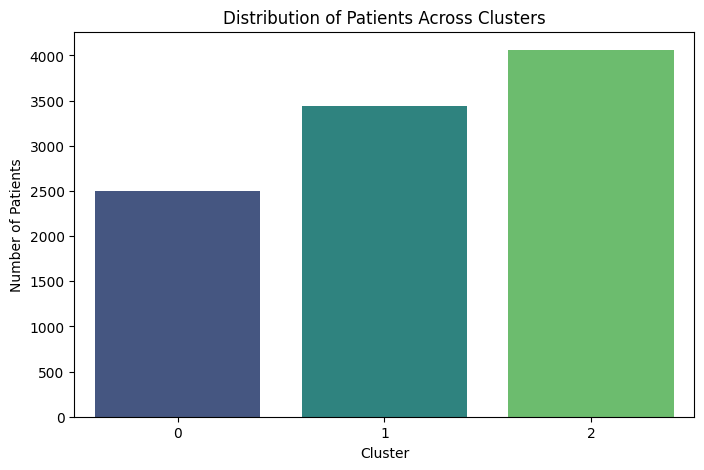

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Stop the active streaming query first
if spark.streams.active:
    for query in spark.streams.active:
        query.stop()
        print(f"Stopped streaming query: {query.name if query.name else query.id}")

# Apply the fitted KMeans model to the transformed static data to get predictions
static_clustered_df = kmeans_model.transform(static_transformed_df)

# Calculate cluster distribution
cluster_distribution = static_clustered_df.groupBy("prediction").count().orderBy("prediction")

# Convert to Pandas DataFrame
cluster_distribution_pd = cluster_distribution.toPandas()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='prediction', y='count', data=cluster_distribution_pd, palette='viridis')
plt.title('Distribution of Patients Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Patients')
plt.show()


Visualize the average BMI distribution across patient clusters and readmission risk groups using a grouped bar chart, then summarize the insights gained from this visualization and the overall analysis of patient clusters, risk groups, and BMI.

In [71]:
clustered_data_for_analysis = static_clustered_df.select('prediction',
                                                    'readmission_risk', 'bmi')
clustered_data_for_analysis.show(5)

+----------+----------------+----+
|prediction|readmission_risk| bmi|
+----------+----------------+----+
|         0|          Medium|23.1|
|         2|            High|52.0|
|         2|             Low|30.7|
|         0|            High|17.5|
|         1|          Medium|20.9|
+----------+----------------+----+
only showing top 5 rows



Now that the relevant columns are selected, I need to calculate the average BMI for each combination of cluster ('prediction') and 'readmission_risk' to prepare for the grouped bar chart visualization.



In [73]:
from pyspark.sql import functions as F

average_bmi_per_group = clustered_data_for_analysis.groupBy('prediction',
              'readmission_risk').agg(F.avg('bmi').alias('average_bmi'))
average_bmi_per_group.show()

+----------+----------------+------------------+
|prediction|readmission_risk|       average_bmi|
+----------+----------------+------------------+
|         2|            High|28.810243183493004|
|         2|             Low| 29.00214338507024|
|         1|             Low| 28.53908355795151|
|         1|            High|28.211371527777732|
|         1|          Medium| 28.75570698466779|
|         0|            High| 28.44672330097088|
|         2|          Medium| 28.13755555555551|
|         0|             Low|28.426874279123403|
|         0|          Medium|28.432138442521637|
+----------+----------------+------------------+




To visualize the grouped bar chart using seaborn and matplotlib, I need to convert the PySpark DataFrame average_bmi_per_group into a Pandas DataFrame.



In [74]:
average_bmi_per_group_pd = average_bmi_per_group.toPandas()
print("PySpark DataFrame converted to Pandas DataFrame.")

PySpark DataFrame converted to Pandas DataFrame.



To visualize the average BMI distribution across clusters and readmission risk groups, I will create a grouped bar chart using the average_bmi_per_group_pd Pandas DataFrame, displaying clusters on the x-axis, average BMI on the y-axis, and using readmission risk for grouping.



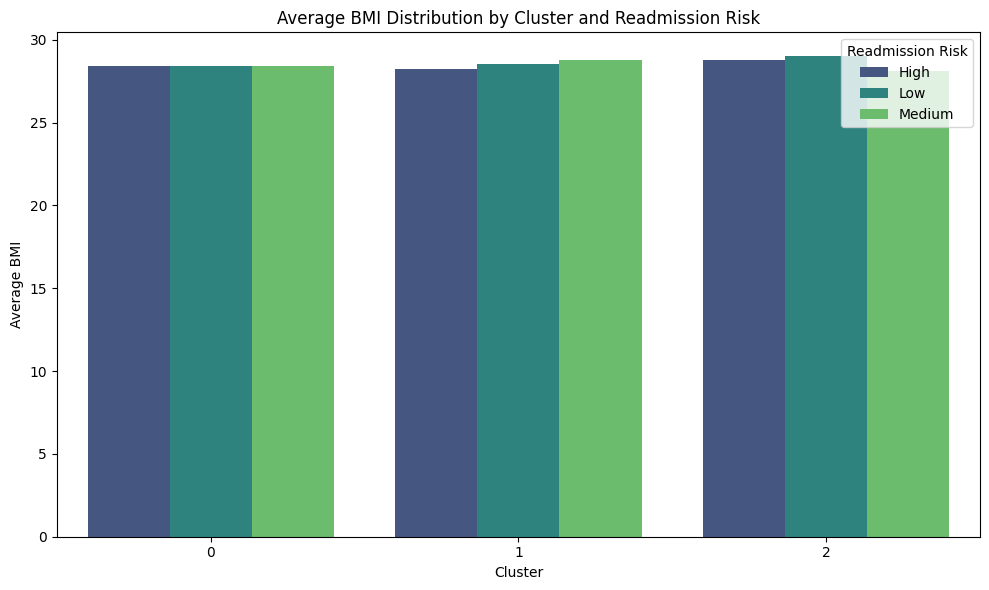

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='prediction',
    y='average_bmi',
    hue='readmission_risk',
    data=average_bmi_per_group_pd,
    palette='viridis'
)
plt.title('Average BMI Distribution by Cluster and Readmission Risk')
plt.xlabel('Cluster')
plt.ylabel('Average BMI')
plt.legend(title='Readmission Risk')
plt.tight_layout()
plt.show()